<a href="https://colab.research.google.com/github/njocimar28/nba/blob/main/Jovens_jogadores_NBA_temporada_2022_23_(at%C3%A9_25_anos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Jovens estrelas NBA temporada 2022-23 - até 25 anos**


## Conhecendo e tratando os dados

In [85]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# selecionando os dados
jogadores = pd.read_csv('https://github.com/njocimar28/nba/blob/84fe6c9d6cb5fdb3d5194e191e767927d5fd235e/jogadores_em_atividade_nba%20(1)?raw=true')

In [87]:
# tamanho dos dados
jogadores.shape

(2988, 28)

In [88]:
# analisando os dados
jogadores.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,JOGADOR
0,1630173,2020-21,0,1610612748,MIA,21.0,61,4,737.0,124,...,73,135,208,29,20,28,43,91,304,Precious Achiuwa
1,1630173,2021-22,0,1610612761,TOR,22.0,73,28,1725.0,265,...,146,327,473,82,37,41,84,151,664,Precious Achiuwa
2,1630173,2022-23,0,1610612761,TOR,23.0,55,12,1141.0,196,...,100,228,328,50,31,30,59,102,508,Precious Achiuwa
3,203500,2013-14,0,1610612760,OKC,20.0,81,20,1197.0,93,...,142,190,332,43,40,57,71,203,265,Steven Adams
4,203500,2014-15,0,1610612760,OKC,21.0,70,67,1771.0,217,...,199,324,523,66,38,86,99,222,537,Steven Adams


In [89]:
# tipos de dados
jogadores.dtypes

PLAYER_ID              int64
SEASON_ID             object
LEAGUE_ID              int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_AGE           float64
GP                     int64
GS                     int64
MIN                  float64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PTS                    int64
JOGADOR               object
dtype: object

In [90]:
#transformando os dados float em int
jogadores[['PLAYER_AGE', 'MIN', 'FG_PCT', 'FG3_PCT', 'FT_PCT']] = jogadores[['PLAYER_AGE', 'MIN', 'FG_PCT', 'FG3_PCT', 'FT_PCT']].astype(int)
jogadores.dtypes

PLAYER_ID             int64
SEASON_ID            object
LEAGUE_ID             int64
TEAM_ID               int64
TEAM_ABBREVIATION    object
PLAYER_AGE            int64
GP                    int64
GS                    int64
MIN                   int64
FGM                   int64
FGA                   int64
FG_PCT                int64
FG3M                  int64
FG3A                  int64
FG3_PCT               int64
FTM                   int64
FTA                   int64
FT_PCT                int64
OREB                  int64
DREB                  int64
REB                   int64
AST                   int64
STL                   int64
BLK                   int64
TOV                   int64
PF                    int64
PTS                   int64
JOGADOR              object
dtype: object

In [91]:
# verficando dados nulos
print(jogadores.isnull().sum())

print(jogadores.isna().sum())

PLAYER_ID            0
SEASON_ID            0
LEAGUE_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
PLAYER_AGE           0
GP                   0
GS                   0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
JOGADOR              0
dtype: int64
PLAYER_ID            0
SEASON_ID            0
LEAGUE_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
PLAYER_AGE           0
GP                   0
GS                   0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              

In [92]:
#dicionário dos termos abreviados
dicionario_nba = {'PLAYER_ID': 'ID do jogador',
                  'SEASON_ID': 'ID da temporada',
                  'LEAGUE_ID': 'ID da liga',
                  'TEAM_ID': 'ID do time',
                  'TEAM_ABBREVIATION': 'Abreviação do time',
                  'PLAYER_AGE': 'Idade do jogador',
                  'GP': 'Partidas jogadas',
                  'GS': 'Partidas iniciadas como titular',
                  'MIN': 'Minutos jogados',
                  'FGM': 'Cestas de quadra convertidas',
                  'FGA': 'Cestas de quadra tentadas',
                  'FG_PCT': 'Percentual de acerto de cestas de quadra',
                  'FG3M': 'Cestas de três pontos convertidas',
                  'FG3A': 'Cestas de três pontos tentadas',
                  'FG3_PCT': 'Percentual de acerto de cestas de três pontos',
                  'FTM': 'Lances livres convertidos',
                  'FTA': 'Lances livres tentados',
                  'FT_PCT': 'Percentual de acerto de lances livres',
                  'OREB': 'Rebotes ofensivos',
                  'DREB': 'Rebotes defensivos',
                  'REB': 'Total de rebotes',
                  'AST': 'Assistências',
                  'STL': 'Roubadas de bola',
                  'BLK': 'Tocos',
                  'TOV': 'Perdas de bola',
                  'PF': 'Faltas pessoais',
                  'PTS': 'Pontos marcados'}

In [93]:
# Criando as colunas com media por jogo
lista_de_estatisticas = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A',
                         'FTM', 'FTA', 'OREB', 'DREB',
                         'REB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PTS', 'MIN'] # Considerado apenas colunas com números absolutos e excluindo as colunas com percetual (PCT)

for i in lista_de_estatisticas:
  jogadores['MEDIA_'+ i] = (jogadores[i] / jogadores['GP']).round(2)

In [94]:
jogadores.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,MEDIA_FTA,MEDIA_OREB,MEDIA_DREB,MEDIA_REB,MEDIA_AST,MEDIA_STL,MEDIA_BLK,MEDIA_TOV,MEDIA_PF,MEDIA_PTS
0,1630173,2020-21,0,1610612748,MIA,21,61,4,737,124,...,1.80,1.20,2.21,3.41,0.48,0.33,0.46,0.70,1.49,4.98
1,1630173,2021-22,0,1610612761,TOR,22,73,28,1725,265,...,1.79,2.00,4.48,6.48,1.12,0.51,0.56,1.15,2.07,9.10
2,1630173,2022-23,0,1610612761,TOR,23,55,12,1141,196,...,2.25,1.82,4.15,5.96,0.91,0.56,0.55,1.07,1.85,9.24
3,203500,2013-14,0,1610612760,OKC,20,81,20,1197,93,...,1.68,1.75,2.35,4.10,0.53,0.49,0.70,0.88,2.51,3.27
4,203500,2014-15,0,1610612760,OKC,21,70,67,1771,217,...,2.93,2.84,4.63,7.47,0.94,0.54,1.23,1.41,3.17,7.67


In [95]:
# Excluir as colunas não utilizadas
colunas_excluidas = ['PLAYER_ID',	'LEAGUE_ID','TEAM_ID']
jogadores = jogadores.drop(columns=colunas_excluidas)

In [96]:
jogadores.head()

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,MEDIA_FTA,MEDIA_OREB,MEDIA_DREB,MEDIA_REB,MEDIA_AST,MEDIA_STL,MEDIA_BLK,MEDIA_TOV,MEDIA_PF,MEDIA_PTS
0,2020-21,MIA,21,61,4,737,124,228,0,0,...,1.80,1.20,2.21,3.41,0.48,0.33,0.46,0.70,1.49,4.98
1,2021-22,TOR,22,73,28,1725,265,603,0,56,...,1.79,2.00,4.48,6.48,1.12,0.51,0.56,1.15,2.07,9.10
2,2022-23,TOR,23,55,12,1141,196,404,0,29,...,2.25,1.82,4.15,5.96,0.91,0.56,0.55,1.07,1.85,9.24
3,2013-14,OKC,20,81,20,1197,93,185,0,0,...,1.68,1.75,2.35,4.10,0.53,0.49,0.70,0.88,2.51,3.27
4,2014-15,OKC,21,70,67,1771,217,399,0,0,...,2.93,2.84,4.63,7.47,0.94,0.54,1.23,1.41,3.17,7.67


In [97]:
# Criando um dicionário com o nome dos times
times_nba = {
    'ATL': 'ATLANTA HAWKS',
    'BOS': 'BOSTON CELTICS',
    'BKN': 'BROOKLYN NETS',
    'CHA': 'CHARLOTTE HORNETS',
    'CHI': 'CHICAGO BULLS',
    'CLE': 'CLEVELAND CAVALIERS',
    'DAL': 'DALLAS MAVERICKS',
    'DEN': 'DENVER NUGGETS',
    'DET': 'DETROIT PISTONS',
    'GSW': 'GOLDEN STATE WARRIORS',
    'HOU': 'HOUSTON ROCKETS',
    'IND': 'INDIANA PACERS',
    'LAC': 'LOS ANGELES CLIPPERS',
    'LAL': 'LOS ANGELES LAKERS',
    'MEM': 'MEMPHIS GRIZZLIES',
    'MIA': 'MIAMI HEAT',
    'MIL': 'MILWAUKEE BUCKS',
    'MIN': 'MINNESOTA TIMBERWOLVES',
    'NOP': 'NEW ORLEANS PELICANS',
    'NYK': 'NEW YORK KNICKS',
    'OKC': 'OKLAHOMA CITY THUNDER',
    'ORL': 'ORLANDO MAGIC',
    'PHI': 'PHILADELPHIA 76ERS',
    'PHX': 'PHOENIX SUNS',
    'POR': 'PORTLAND TRAIL BLAZERS',
    'SAC': 'SACRAMENTO KINGS',
    'SAS': 'SAN ANTONIO SPURS',
    'TOR': 'TORONTO RAPTORS',
    'UTA': 'UTAH JAZZ',
    'WAS': 'WASHINGTON WIZARDS'
}

In [98]:
# Criando a coluna Time
jogadores['TIME'] = jogadores['TEAM_ABBREVIATION'].map(times_nba)

In [99]:
jogadores.head()

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,MEDIA_OREB,MEDIA_DREB,MEDIA_REB,MEDIA_AST,MEDIA_STL,MEDIA_BLK,MEDIA_TOV,MEDIA_PF,MEDIA_PTS,TIME
0,2020-21,MIA,21,61,4,737,124,228,0,0,...,1.20,2.21,3.41,0.48,0.33,0.46,0.70,1.49,4.98,MIAMI HEAT
1,2021-22,TOR,22,73,28,1725,265,603,0,56,...,2.00,4.48,6.48,1.12,0.51,0.56,1.15,2.07,9.10,TORONTO RAPTORS
2,2022-23,TOR,23,55,12,1141,196,404,0,29,...,1.82,4.15,5.96,0.91,0.56,0.55,1.07,1.85,9.24,TORONTO RAPTORS
3,2013-14,OKC,20,81,20,1197,93,185,0,0,...,1.75,2.35,4.10,0.53,0.49,0.70,0.88,2.51,3.27,OKLAHOMA CITY THUNDER
4,2014-15,OKC,21,70,67,1771,217,399,0,0,...,2.84,4.63,7.47,0.94,0.54,1.23,1.41,3.17,7.67,OKLAHOMA CITY THUNDER


## Criando funções para análise dos dados

### Função média de pontos por jogo

In [100]:
# Criando função para calcular a média de pontos por jogo
def calcular_media_pontos(time):
    media_pts = pd.DataFrame(time[['JOGADOR', 'MEDIA_PTS']])
    media_pts = media_pts.sort_values('MEDIA_PTS', ascending=False)
    media_pts = media_pts.reset_index(drop=True)
    media_pts['RANK'] = media_pts.index + 1
    return media_pts.head()

### Função média de assistências por jogo

In [101]:
# Criando função para calcular a média de assistências por jogo
def calcular_media_assistencias(time):
    media_ast = pd.DataFrame(time[['JOGADOR', 'MEDIA_AST']])
    media_ast = media_ast.sort_values('MEDIA_AST', ascending=False)
    media_ast = media_ast.reset_index(drop=True)
    media_ast['RANK'] = media_ast.index + 1
    return media_ast.head()

### Função média de rebotes por jogo

In [102]:
# Criando função para calcular media de rebotes por jogo
def calcular_media_rebotes(time):
    media_rebotes = pd.DataFrame(time[['JOGADOR', 'MEDIA_REB', 'MEDIA_OREB', 'MEDIA_DREB']])
    media_rebotes = media_rebotes.sort_values('MEDIA_REB', ascending=False)
    media_rebotes = media_rebotes.reset_index(drop=True)
    media_rebotes['REB_OFENSIVOS %'] = media_rebotes['MEDIA_OREB'] / media_rebotes['MEDIA_REB']
    media_rebotes['REB_DEFENSIVOS %'] = media_rebotes['MEDIA_DREB'] / media_rebotes['MEDIA_REB']
    media_rebotes['RANK'] = media_rebotes.index + 1
    media_rebotes = media_rebotes.head().round(2)
    return media_rebotes

In [170]:
# Criando função para calcular media de rebotes ofensivos por jogo
def calcular_media_rebotes_ofensivos(time):
    media_rebotes = pd.DataFrame(time[['JOGADOR', 'MEDIA_REB', 'MEDIA_OREB', 'MEDIA_DREB']])
    media_rebotes = media_rebotes.sort_values('MEDIA_OREB', ascending=False)
    media_rebotes = media_rebotes.reset_index(drop=True)
    media_rebotes['REB_OFENSIVOS %'] = media_rebotes['MEDIA_OREB'] / media_rebotes['MEDIA_REB']
    media_rebotes['REB_DEFENSIVOS %'] = media_rebotes['MEDIA_DREB'] / media_rebotes['MEDIA_REB']
    media_rebotes['RANK'] = media_rebotes.index + 1
    media_rebotes = media_rebotes.head().round(2)
    return media_rebotes

In [171]:
# Criando função para calcular media de rebotes defensivos por jogo
def calcular_media_rebotes_defensivos(time):
    media_rebotes = pd.DataFrame(time[['JOGADOR', 'MEDIA_REB', 'MEDIA_OREB', 'MEDIA_DREB']])
    media_rebotes = media_rebotes.sort_values('MEDIA_DREB', ascending=False)
    media_rebotes = media_rebotes.reset_index(drop=True)
    media_rebotes['REB_OFENSIVOS %'] = media_rebotes['MEDIA_OREB'] / media_rebotes['MEDIA_REB']
    media_rebotes['REB_DEFENSIVOS %'] = media_rebotes['MEDIA_DREB'] / media_rebotes['MEDIA_REB']
    media_rebotes['RANK'] = media_rebotes.index + 1
    media_rebotes = media_rebotes.head().round(2)
    return media_rebotes

### Função média de lances livres por jogo

In [103]:
# Criando função para calcular media de lances livres por jogo
def calcular_media_lances_livres(time):
    media_lances_livres = pd.DataFrame(time[['JOGADOR', 'MEDIA_FTA', 'MEDIA_FTM']])
    media_lances_livres['% ACERTOS'] = media_lances_livres['MEDIA_FTM'] / media_lances_livres['MEDIA_FTA']
    media_lances_livres = media_lances_livres.sort_values('MEDIA_FTM', ascending=False)
    media_lances_livres = media_lances_livres.reset_index(drop=True)
    media_lances_livres['RANK'] = media_lances_livres.index + 1
    media_lances_livres = media_lances_livres.head().round(2)
    return media_lances_livres

### Função média de arremessos por jogo

In [104]:
# Criando função para calcular media de arremessos por jogo
def calcular_media_arremessos(time):
    media_arremessos = pd.DataFrame(time[['JOGADOR', 'MEDIA_FGA', 'MEDIA_FGM']])
    media_arremessos['% ACERTOS'] = media_arremessos['MEDIA_FGM'] / media_arremessos['MEDIA_FGA']
    media_arremessos = media_arremessos.sort_values('MEDIA_FGM', ascending=False)
    media_arremessos = media_arremessos.reset_index(drop=True)
    media_arremessos['RANK'] = media_arremessos.index + 1
    media_arremessos = media_arremessos.head().round(2)
    return media_arremessos

### Função média de arremessos de 3 pontos por jogo

In [105]:
# Criando função para calcular media de arremessos de 3 pontos por jogo
def calcular_media_arremessos_3pts(time):
    media_arremessos_3pts = pd.DataFrame(time[['JOGADOR', 'MEDIA_FG3A', 'MEDIA_FG3M']])
    media_arremessos_3pts['% ACERTOS'] = media_arremessos_3pts['MEDIA_FG3M'] / media_arremessos_3pts['MEDIA_FG3A']
    media_arremessos_3pts = media_arremessos_3pts.sort_values('MEDIA_FG3M', ascending=False)
    media_arremessos_3pts = media_arremessos_3pts.reset_index(drop=True)
    media_arremessos_3pts['RANK'] = media_arremessos_3pts.index + 1
    media_arremessos_3pts = media_arremessos_3pts.head().round(2)
    return media_arremessos_3pts

### Função quantidade de jogos na temporada

In [106]:
# Criando função para calcular a quantidade de jogos por temporada
def calcular_jogos(time):
    numero_jogos = pd.DataFrame(time[['JOGADOR', 'GP', 'GS']])
    numero_jogos['% COMO TITULAR'] = numero_jogos['GS'] / numero_jogos['GP']
    numero_jogos = numero_jogos.sort_values('GP', ascending=False)
    numero_jogos = numero_jogos.reset_index(drop=True)
    numero_jogos['RANK'] = numero_jogos.index + 1
    numero_jogos = numero_jogos.head().round(2)
    return numero_jogos

In [164]:
# Criando função para calcular a quantidade de jogos como titular por temporada
def calcular_jogos_titular(time):
    numero_jogos = pd.DataFrame(time[['JOGADOR', 'GP', 'GS']])
    numero_jogos['% COMO TITULAR'] = numero_jogos['GS'] / numero_jogos['GP']
    numero_jogos = numero_jogos.sort_values('GS', ascending=False)
    numero_jogos = numero_jogos.reset_index(drop=True)
    numero_jogos['RANK'] = numero_jogos.index + 1
    numero_jogos = numero_jogos.head().round(2)
    return numero_jogos

### Função quantidade de minutos por temporada

In [107]:
# Criando função para calcular a quantidade de minutos por temporada
def calcular_minutos(time):
    numero_minutos = pd.DataFrame(time[['JOGADOR', 'MEDIA_MIN']])
    numero_minutos = numero_minutos.sort_values('MEDIA_MIN', ascending=False)
    numero_minutos = numero_minutos.reset_index(drop=True)
    numero_minutos['RANK'] = numero_minutos.index + 1
    numero_minutos = numero_minutos.head().round(2)
    return numero_minutos

### Função média de roubos de bola por jogo

In [108]:
# Criando função para calcular a média de roubos de bola por jogo
def calcular_media_roubos(time):
    media_roubos = pd.DataFrame(time[['JOGADOR', 'MEDIA_STL']])
    media_roubos = media_roubos.sort_values('MEDIA_STL', ascending=False)
    media_roubos = media_roubos.reset_index(drop=True)
    media_roubos['RANK'] = media_roubos.index + 1
    return media_roubos.head()

### Função média de tocos por jogo

In [109]:
# Criando função para calcular a média de tocos por jogo
def calcular_media_tocos(time):
    media_tocos = pd.DataFrame(time[['JOGADOR', 'MEDIA_BLK']])
    media_tocos = media_tocos.sort_values('MEDIA_BLK', ascending=False)
    media_tocos = media_tocos.reset_index(drop=True)
    media_tocos['RANK'] = media_tocos.index + 1
    return media_tocos.head()

### Função média de erros de posse/perda de bola por jogo

In [110]:
# Criando função para calcular a média de perda de bola (erro de posse / turn over) por jogo
def calcular_media_perda(time):
    media_perda = pd.DataFrame(time[['JOGADOR', 'MEDIA_TOV']])
    media_perda = media_perda.sort_values('MEDIA_TOV', ascending=False)
    media_perda = media_perda.reset_index(drop=True)
    media_perda['RANK'] = media_perda.index + 1
    return media_perda.head()

### Função média de faltas cometidas por jogo

In [111]:
# Criando função para calcular a média de faltas pessoais por jogo
def calcular_media_faltas(time):
    media_faltas = pd.DataFrame(time[['JOGADOR', 'MEDIA_PF']])
    media_faltas = media_faltas.sort_values('MEDIA_PF', ascending=False)
    media_faltas = media_faltas.reset_index(drop=True)
    media_faltas['RANK'] = media_faltas.index + 1
    return media_faltas.head()

## Criando o Data Frame com os jovens jogadores

In [112]:
# Filtrando os dados dos jogadores que atuaram pelos Lakers na temporada 2022/23
jovens_jogadores = jogadores.query("PLAYER_AGE <= 25 and SEASON_ID == '2022-23'")
jovens_jogadores.head()

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,MEDIA_OREB,MEDIA_DREB,MEDIA_REB,MEDIA_AST,MEDIA_STL,MEDIA_BLK,MEDIA_TOV,MEDIA_PF,MEDIA_PTS,TIME
2,2022-23,TOR,23,55,12,1141,196,404,0,29,...,1.82,4.15,5.96,0.91,0.56,0.55,1.07,1.85,9.24,TORONTO RAPTORS
18,2022-23,MIA,25,75,75,2598,602,1114,0,1,...,2.45,6.72,9.17,3.20,1.17,0.81,2.49,2.77,20.39,MIAMI HEAT
19,2022-23,UTA,23,59,22,1209,165,386,0,81,...,0.73,1.32,2.05,1.14,0.27,0.25,0.69,1.68,7.92,UTAH JAZZ
21,2022-23,MEM,22,77,20,1682,247,525,0,94,...,1.10,3.71,4.82,1.26,0.58,0.62,0.78,1.86,9.04,MEMPHIS GRIZZLIES
27,2022-23,UTA,24,36,3,528,83,170,0,35,...,0.22,1.42,1.64,2.11,0.67,0.39,1.25,1.61,6.33,UTAH JAZZ


## Estatíticas de comparação jovens estrelas da NBA - temporada 20022/23

### Média de pontos por jogo

In [113]:
# Criando um rank de media pontos com os jovens jogadores
media_pts_jovens = calcular_media_pontos(jovens_jogadores)

# Selecionar os 5 primeiros jogadores com base no rank
media_pts_jovens = media_pts_jovens.head(5)
media_pts_jovens.head()

,JOGADOR,MEDIA_PTS,RANK
0,Luka Doncic,32.39,1
1,Shai Gilgeous-Alexander,31.40,2
2,Jayson Tatum,30.07,3
3,Trae Young,26.22,4
4,Ja Morant,26.16,5


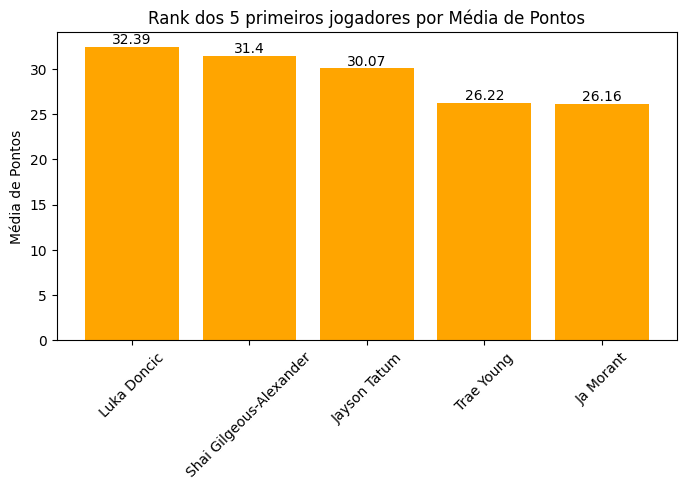

In [130]:
# Plotar o gráfico com o rank de pontuação
plt.figure(figsize=(8, 4))
ax = plt.bar(media_pts_jovens['JOGADOR'], media_pts_jovens['MEDIA_PTS'], color='orange')
plt.ylabel('Média de Pontos')
plt.title('Rank dos 5 primeiros jogadores por Média de Pontos')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de assistências por jogo

In [115]:
# Criando um rank de media de assistências dos jovens jogadores
media_ast_jovens = calcular_media_assistencias(jovens_jogadores)
media_ast_jovens = media_ast_jovens.head(5)
media_ast_jovens.head()

,JOGADOR,MEDIA_AST,RANK
0,Tyrese Haliburton,10.45,1
1,Trae Young,10.15,2
2,LaMelo Ball,8.44,3
3,Ja Morant,8.08,4
4,Luka Doncic,8.02,5


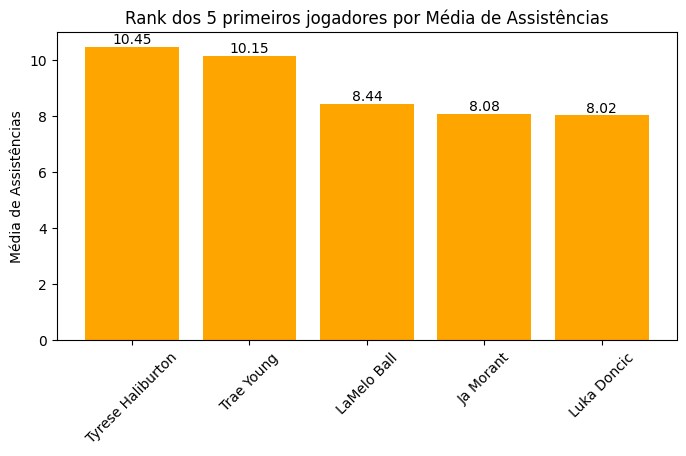

In [131]:
# Plotar o gráfico com o rank de assistÊncias
plt.figure(figsize=(8, 4))
ax = plt.bar(media_ast_jovens['JOGADOR'], media_ast_jovens['MEDIA_AST'], color='orange')
plt.ylabel('Média de Assistências')
plt.title('Rank dos 5 primeiros jogadores por Média de Assistências')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de rebotes por jogo

In [177]:
# Criando um rank de media de rebotes dos jovens jogadores
media_reb_jovens = calcular_media_rebotes(jovens_jogadores)
media_reb_jovens =media_reb_jovens.head(5)
media_reb_jovens.head()

,JOGADOR,MEDIA_REB,MEDIA_OREB,MEDIA_DREB,REB_OFENSIVOS %,REB_DEFENSIVOS %,RANK
0,Deandre Ayton,9.96,2.57,7.39,0.26,0.74,1
1,Jarrett Allen,9.79,3.25,6.54,0.33,0.67,2
2,Mitchell Robinson,9.41,4.53,4.88,0.48,0.52,3
3,Bam Adebayo,9.17,2.45,6.72,0.27,0.73,4
4,Evan Mobley,9.00,2.37,6.63,0.26,0.74,5


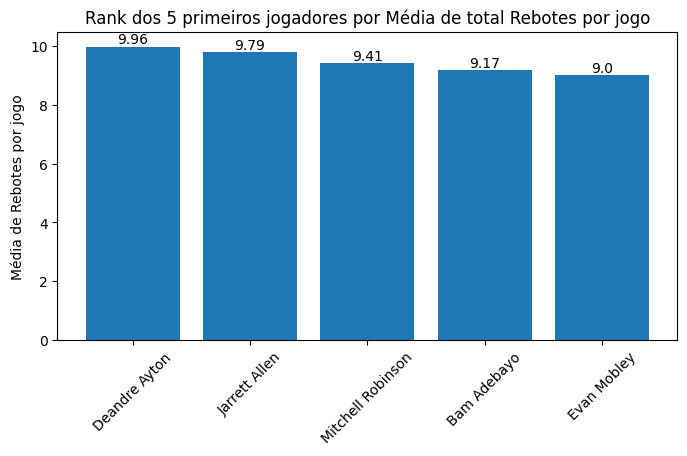

In [178]:
# Plotar o gráfico com o rank de rebotes total por jogo
plt.figure(figsize=(8, 4))
ax = plt.bar(media_reb_jovens['JOGADOR'], media_reb_jovens['MEDIA_REB'])
plt.ylabel('Média de Rebotes por jogo')
plt.title('Rank dos 5 primeiros jogadores por Média de total Rebotes por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

In [179]:
# Criando um rank de media de rebotes ofensivos dos jovens jogadores
media_reb_jovens = calcular_media_rebotes_ofensivos(jovens_jogadores)
media_reb_jovens = media_reb_jovens.head(5)
media_reb_jovens.head()

,JOGADOR,MEDIA_REB,MEDIA_OREB,MEDIA_DREB,REB_OFENSIVOS %,REB_DEFENSIVOS %,RANK
0,Mitchell Robinson,9.41,4.53,4.88,0.48,0.52,1
1,Jalen Duren,8.88,3.42,5.46,0.39,0.61,2
2,Jarrett Allen,9.79,3.25,6.54,0.33,0.67,3
3,Walker Kessler,8.38,3.12,5.26,0.37,0.63,4
4,Robert Williams III,8.34,2.97,5.37,0.36,0.64,5


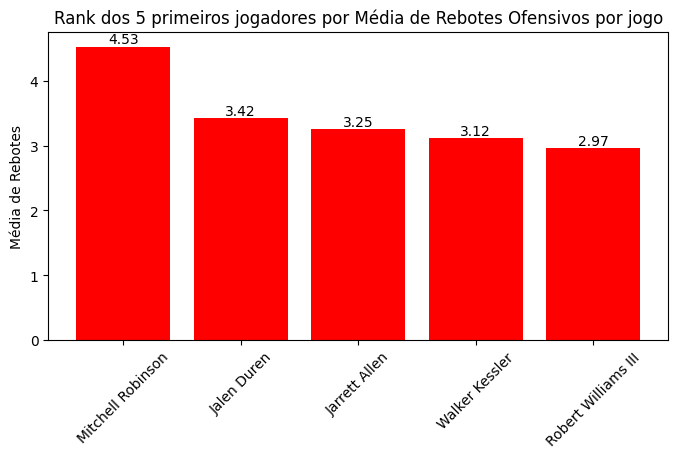

In [180]:
# Plotar o gráfico com o rank de rebotes ofensivos
plt.figure(figsize=(8, 4))
ax = plt.bar(media_reb_jovens['JOGADOR'], media_reb_jovens['MEDIA_OREB'], color='red')
plt.ylabel('Média de Rebotes')
plt.title('Rank dos 5 primeiros jogadores por Média de Rebotes Ofensivos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

In [181]:
# Criando um rank de media de rebotes defensivos dos jovens jogadores
media_reb_jovens = calcular_media_rebotes_defensivos(jovens_jogadores)
media_reb_jovens = media_reb_jovens.head(5)
media_reb_jovens.head()

,JOGADOR,MEDIA_REB,MEDIA_OREB,MEDIA_DREB,REB_OFENSIVOS %,REB_DEFENSIVOS %,RANK
0,Luka Doncic,8.62,0.82,7.80,0.10,0.90,1
1,Jayson Tatum,8.77,1.05,7.72,0.12,0.88,2
2,Deandre Ayton,9.96,2.57,7.39,0.26,0.74,3
3,Bam Adebayo,9.17,2.45,6.72,0.27,0.73,4
4,Lauri Markkanen,8.64,1.97,6.67,0.23,0.77,5


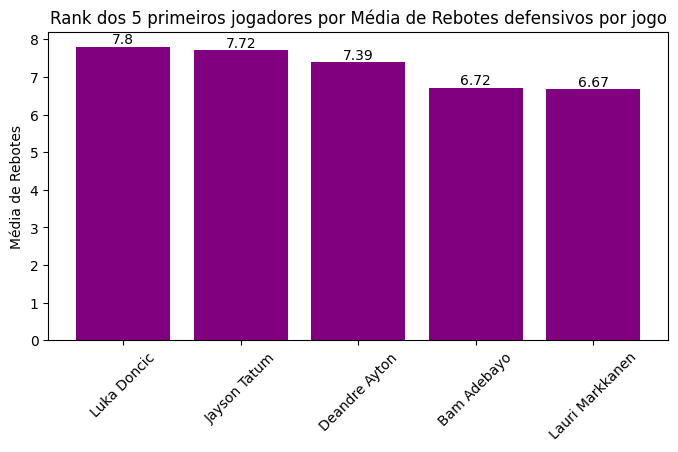

In [183]:
# Plotar o gráfico com o rank de rebotes defensivos
plt.figure(figsize=(8, 4))
ax = plt.bar(media_reb_jovens['JOGADOR'], media_reb_jovens['MEDIA_DREB'], color='purple')
plt.ylabel('Média de Rebotes')
plt.title('Rank dos 5 primeiros jogadores por Média de Rebotes defensivos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de Lances Livres por jogo

In [121]:
# Criando um rank de media de lances livres dos jovens jogadores
media_lances_livres_jovens = calcular_media_lances_livres(jovens_jogadores)
media_lances_livres_jovens = media_lances_livres_jovens.head(5)
media_lances_livres_jovens.head()

,JOGADOR,MEDIA_FTA,MEDIA_FTM,% ACERTOS,RANK
0,Shai Gilgeous-Alexander,10.87,9.84,0.91,1
1,Luka Doncic,10.52,7.80,0.74,2
2,Trae Young,8.75,7.75,0.89,3
3,Jayson Tatum,8.41,7.18,0.85,4
4,Zion Williamson,8.55,6.10,0.71,5


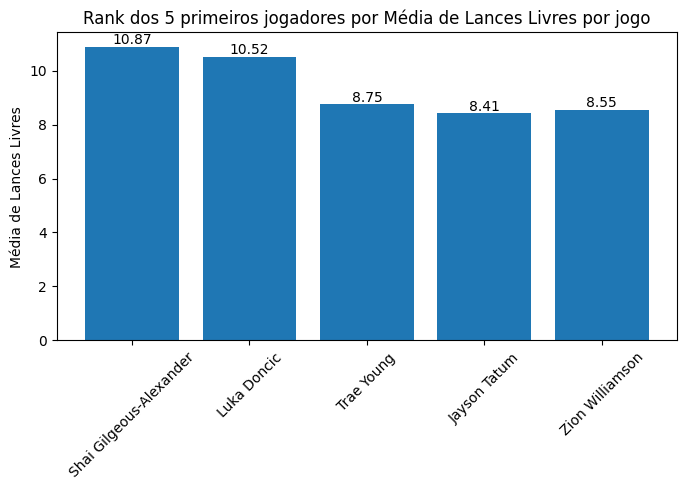

In [122]:
# Plotar o gráfico com o rank de lances livres tentados
plt.figure(figsize=(8, 4))
ax = plt.bar(media_lances_livres_jovens['JOGADOR'], media_lances_livres_jovens['MEDIA_FTA'])
plt.ylabel('Média de Lances Livres')
plt.title('Rank dos 5 primeiros jogadores por Média de Lances Livres por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

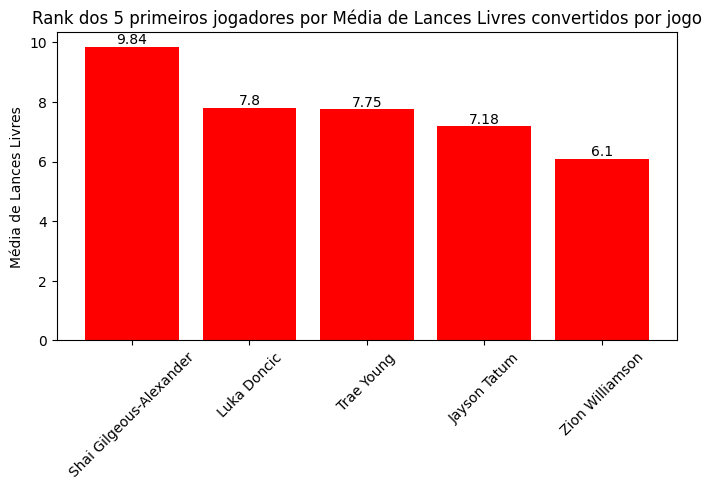

In [123]:
# Plotar o gráfico com o rank de lances livres convertidos
plt.figure(figsize=(8, 4))
ax = plt.bar(media_lances_livres_jovens['JOGADOR'], media_lances_livres_jovens['MEDIA_FTM'], color='red')
plt.ylabel('Média de Lances Livres')
plt.title('Rank dos 5 primeiros jogadores por Média de Lances Livres convertidos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

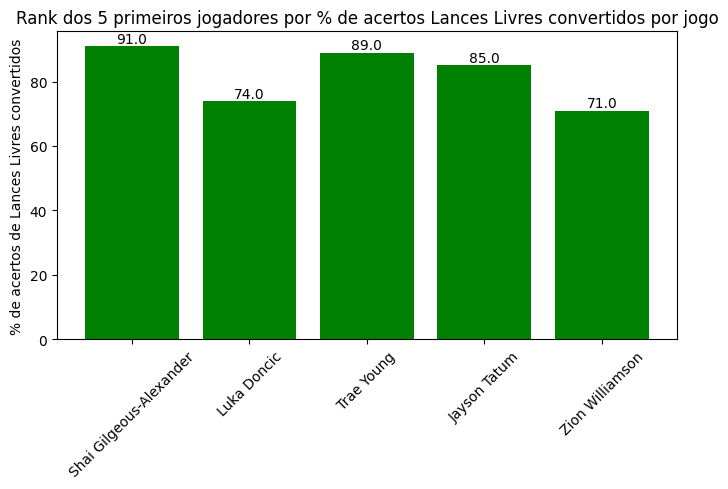

In [124]:
# Plotar o gráfico com o rank de % lances livres convertidos
plt.figure(figsize=(8, 4))
ax = plt.bar(media_lances_livres_jovens['JOGADOR'], (media_lances_livres_jovens['% ACERTOS']*100), color='green')
plt.ylabel('% de acertos de Lances Livres convertidos')
plt.title('Rank dos 5 primeiros jogadores por % de acertos Lances Livres convertidos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de arremessos de quadra por jogo

In [125]:
# Criando um rank de media de arremessos de quadra dos jovens jogadores
media_arremessos_jovens = calcular_media_arremessos(jovens_jogadores)
media_arremessos_jovens = media_arremessos_jovens.head(5)
media_arremessos_jovens.head()

,JOGADOR,MEDIA_FGA,MEDIA_FGM,% ACERTOS,RANK
0,Luka Doncic,21.95,10.89,0.50,1
1,Shai Gilgeous-Alexander,20.31,10.35,0.51,2
2,Zion Williamson,16.17,9.83,0.61,3
3,Jayson Tatum,21.07,9.82,0.47,4
4,De'Aaron Fox,18.23,9.34,0.51,5


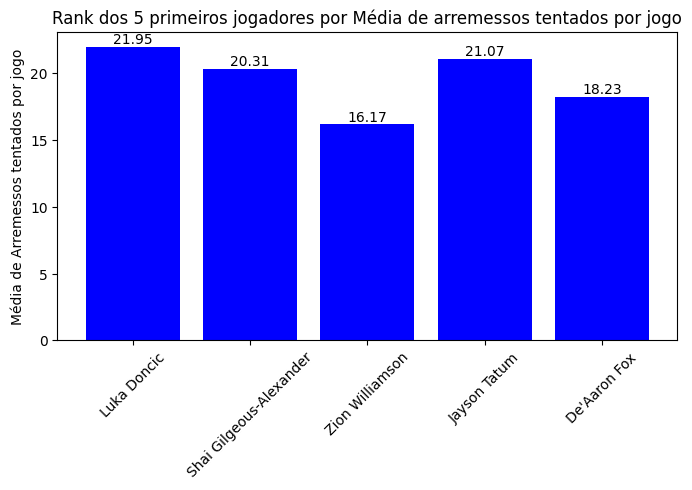

In [126]:
# Plotar o gráfico com o rank de arremessos tentados por jogo
plt.figure(figsize=(8, 4))
ax = plt.bar(media_arremessos_jovens['JOGADOR'], media_arremessos_jovens['MEDIA_FGA'], color='blue')
plt.ylabel('Média de Arremessos tentados por jogo')
plt.title('Rank dos 5 primeiros jogadores por Média de arremessos tentados por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

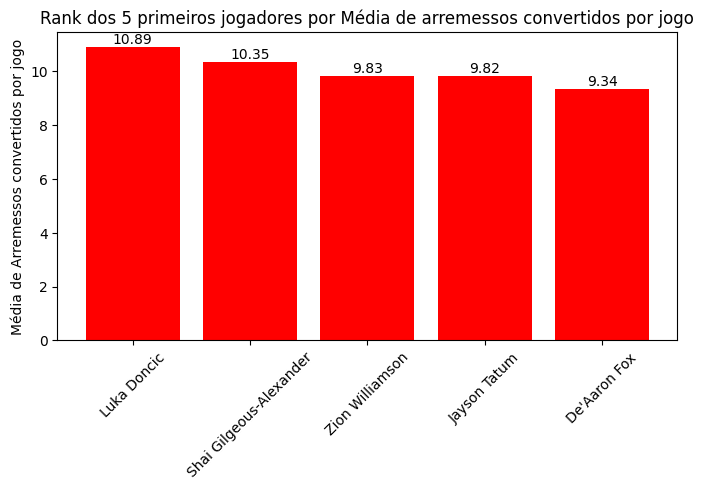

In [127]:
# Plotar o gráfico com o rank de arremessos convertidos por jogo
plt.figure(figsize=(8, 4))
ax = plt.bar(media_arremessos_jovens['JOGADOR'], media_arremessos_jovens['MEDIA_FGM'], color='red')
plt.ylabel('Média de Arremessos convertidos por jogo')
plt.title('Rank dos 5 primeiros jogadores por Média de arremessos convertidos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

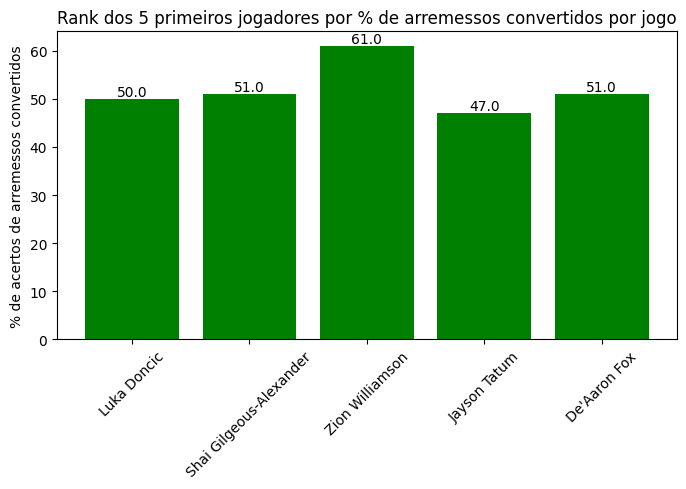

In [128]:
# Plotar o gráfico com o rank de % arremessos convertidos
plt.figure(figsize=(8, 4))
ax = plt.bar(media_arremessos_jovens['JOGADOR'], (media_arremessos_jovens['% ACERTOS']*100), color='green')
plt.ylabel('% de acertos de arremessos convertidos')
plt.title('Rank dos 5 primeiros jogadores por % de arremessos convertidos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de arremessos de 3 pontos por jogo

In [132]:
# Criando um rank de media de arremessos de 3 pontos dos jovens jogadores
media_arremessos_3pts_jovens = calcular_media_arremessos_3pts(jovens_jogadores)
media_arremessos_3pts_jovens = media_arremessos_3pts_jovens.head(5)
media_arremessos_3pts_jovens.head()

,JOGADOR,MEDIA_FG3A,MEDIA_FG3M,% ACERTOS,RANK
0,LaMelo Ball,10.64,4.00,0.38,1
1,Louis King,8.00,4.00,0.50,2
2,Anfernee Simons,9.06,3.42,0.38,3
3,Jayson Tatum,9.27,3.24,0.35,4
4,Tyler Herro,8.01,3.03,0.38,5


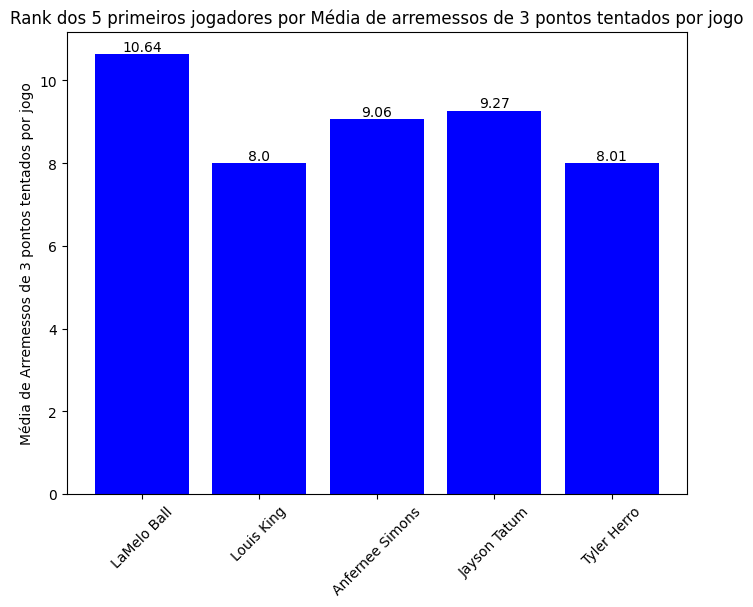

In [134]:
# Plotar o gráfico com o rank de arremessos de 3 pontos tentados por jogo
plt.figure(figsize=(8, 6))
ax = plt.bar(media_arremessos_3pts_jovens['JOGADOR'], media_arremessos_3pts_jovens['MEDIA_FG3A'], color='blue')
plt.ylabel('Média de Arremessos de 3 pontos tentados por jogo')
plt.title('Rank dos 5 primeiros jogadores por Média de arremessos de 3 pontos tentados por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

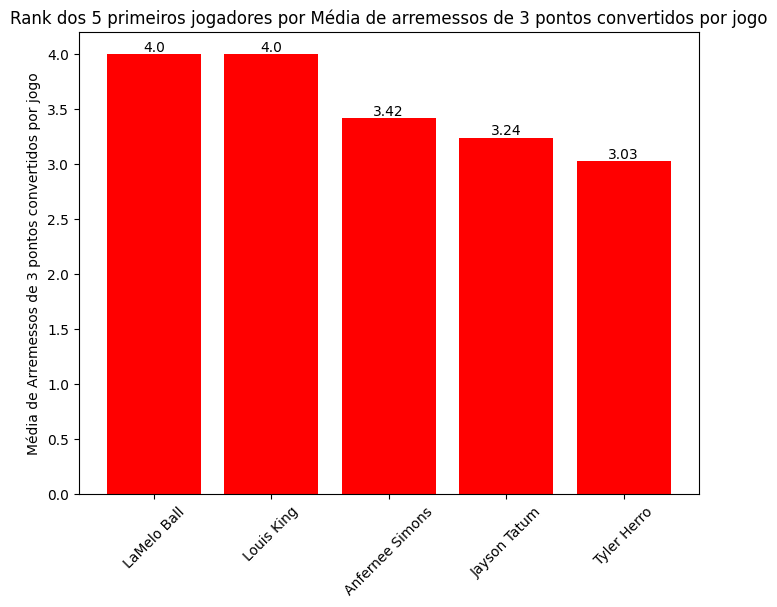

In [136]:
# Plotar o gráfico com o rank de arremessos de 3 pontos convertidos por jogo
plt.figure(figsize=(8, 6))
ax = plt.bar(media_arremessos_3pts_jovens['JOGADOR'], media_arremessos_3pts_jovens['MEDIA_FG3M'], color='red')
plt.ylabel('Média de Arremessos de 3 pontos convertidos por jogo')
plt.title('Rank dos 5 primeiros jogadores por Média de arremessos de 3 pontos convertidos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

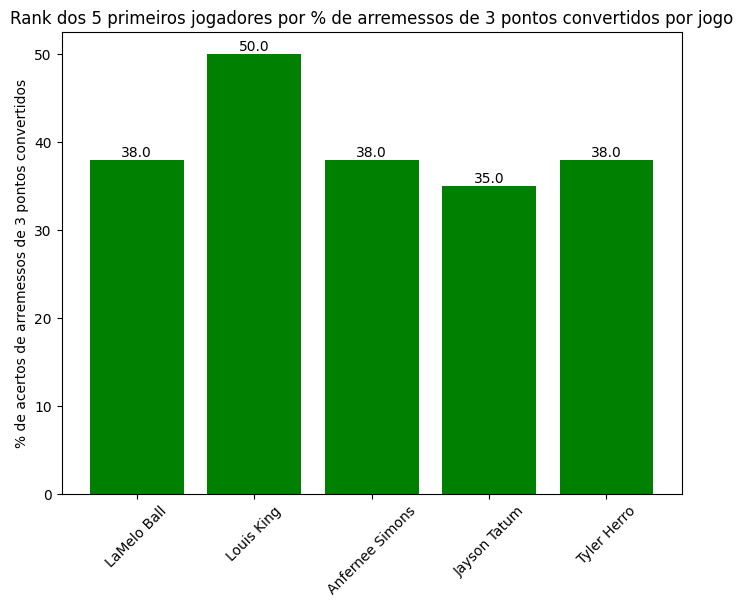

In [137]:
# Plotar o gráfico com o rank de % arremessos de 3 pontos convertidos
plt.figure(figsize=(8, 6))
ax = plt.bar(media_arremessos_3pts_jovens['JOGADOR'], (media_arremessos_3pts_jovens['% ACERTOS']*100), color='green')
plt.ylabel('% de acertos de arremessos de 3 pontos convertidos')
plt.title('Rank dos 5 primeiros jogadores por % de arremessos de 3 pontos convertidos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de roubos de bola por jogo

In [138]:
# Criando um rank de media de roubos de bola com os jovens jogadores
media_roubos_jovens = calcular_media_roubos(jovens_jogadores)
media_roubos_jovens = media_roubos_jovens.head(5)
media_roubos_jovens.head()

,JOGADOR,MEDIA_STL,RANK
0,O.G. Anunoby,1.91,1
1,Shai Gilgeous-Alexander,1.65,2
2,De'Anthony Melton,1.64,3
3,Tyrese Haliburton,1.62,4
4,Gary Trent Jr.,1.58,5


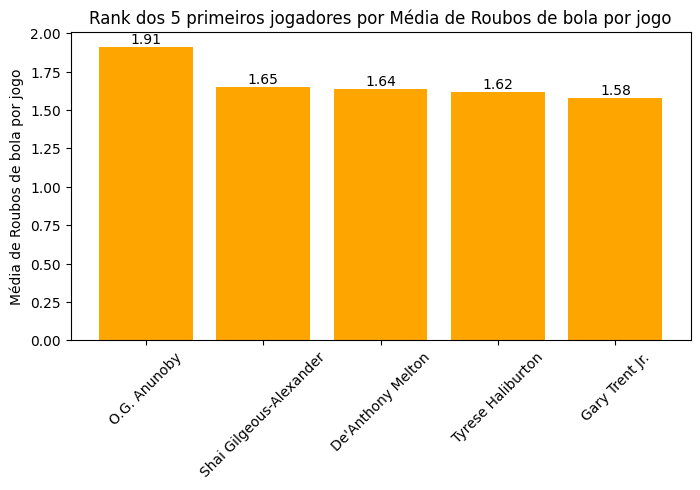

In [141]:
# Plotar o gráfico com o rank de Roubos de bola
plt.figure(figsize=(8, 4))
ax = plt.bar(media_roubos_jovens['JOGADOR'], media_roubos_jovens['MEDIA_STL'], color='orange')
plt.ylabel('Média de Roubos de bola por jogo')
plt.title('Rank dos 5 primeiros jogadores por Média de Roubos de bola por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de erros de posse por jogo

In [142]:
# Criando um rank de media de perdas de bola com os jovens jogadores
media_turnover_jovens = calcular_media_perda(jovens_jogadores)
media_turnover_jovens = media_turnover_jovens.head(5)
media_turnover_jovens.head()

,JOGADOR,MEDIA_TOV,RANK
0,Trae Young,4.11,1
1,LaMelo Ball,3.58,2
2,Luka Doncic,3.58,3
3,Zion Williamson,3.41,4
4,Ja Morant,3.38,5


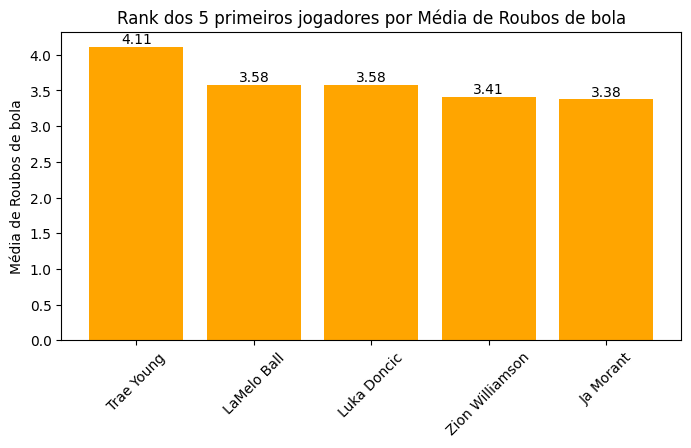

In [144]:
# Plotar o gráfico com o rank de média de erros de posses por jogo
plt.figure(figsize=(8, 4))
ax = plt.bar(media_turnover_jovens['JOGADOR'], media_turnover_jovens['MEDIA_TOV'], color='orange')
plt.ylabel('Média de Roubos de bola')
plt.title('Rank dos 5 primeiros jogadores por Média de Roubos de bola')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de tocos por jogo

In [145]:
# Criando um rank de media de tocos com os jovens jogadores
media_tocos_jovens = calcular_media_tocos(jovens_jogadores)
media_tocos_jovens = media_tocos_jovens.head(5)
media_tocos_jovens.head()

,JOGADOR,MEDIA_BLK,RANK
0,Jaren Jackson Jr.,3.00,1
1,Walker Kessler,2.34,2
2,Mitchell Robinson,1.85,3
3,Evan Mobley,1.51,4
4,Isaiah Jackson,1.48,5


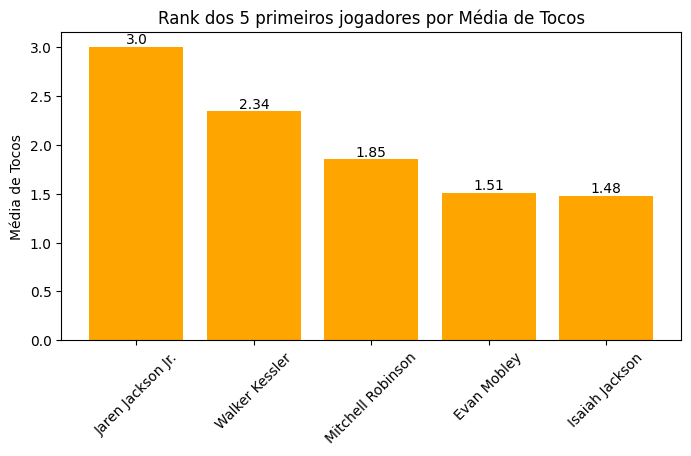

In [146]:
# Plotar o gráfico com o rank de média de tocos por jogo
plt.figure(figsize=(8, 4))
ax = plt.bar(media_tocos_jovens['JOGADOR'], media_tocos_jovens['MEDIA_BLK'], color='orange')
plt.ylabel('Média de Tocos')
plt.title('Rank dos 5 primeiros jogadores por Média de Tocos')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de faltas pessoais por jogo

In [147]:
# Criando um rank de media de faltas cometidas com jovens jogadores
media_faltas_jovens = calcular_media_faltas(jovens_jogadores)
media_faltas_jovens = media_faltas_jovens.head(5)
media_faltas_jovens.head()

,JOGADOR,MEDIA_PF,RANK
0,Louis King,4.00,1
1,Jaren Jackson Jr.,3.60,2
2,Jaden McDaniels,3.44,3
3,Luguentz Dort,3.28,4
4,LaMelo Ball,3.28,5


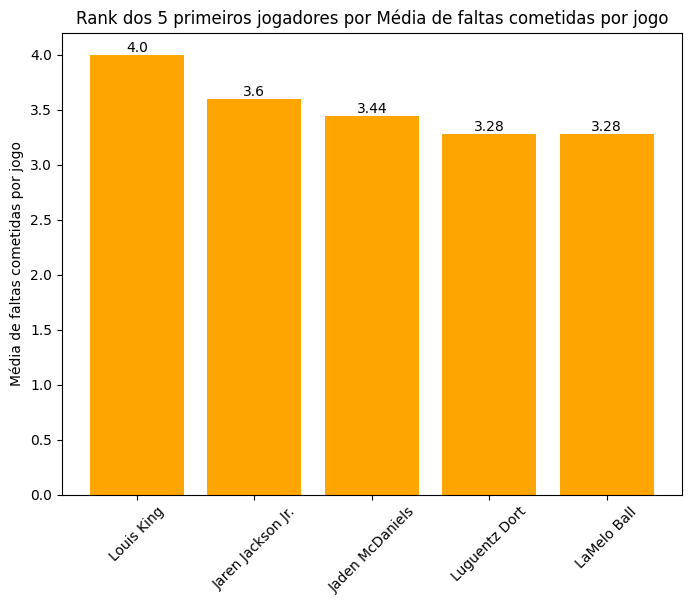

In [148]:
# Plotar o gráfico com o rank de média de faltas cometidas por jogo
plt.figure(figsize=(8, 6))
ax = plt.bar(media_faltas_jovens['JOGADOR'], media_faltas_jovens['MEDIA_PF'], color='orange')
plt.ylabel('Média de faltas cometidas por jogo')
plt.title('Rank dos 5 primeiros jogadores por Média de faltas cometidas por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Média de minutos por jogo

In [149]:
# Criando um rank de media de minutos por jogo com jovens jogadores
media_minutos_jovens = calcular_minutos(jovens_jogadores)
media_minutos_jovens = media_minutos_jovens.head(5)
media_minutos_jovens.head()

,JOGADOR,MEDIA_MIN,RANK
0,Jayson Tatum,36.92,1
1,Luka Doncic,36.23,2
2,Anthony Edwards,35.96,3
3,O.G. Anunoby,35.61,4
4,Shai Gilgeous-Alexander,35.53,5


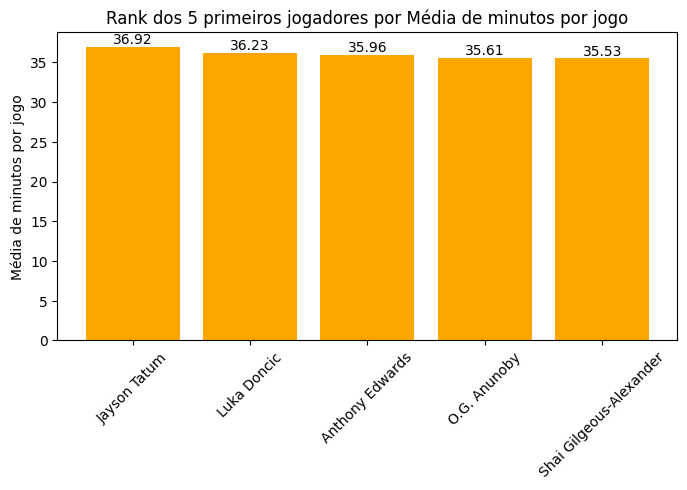

In [151]:
# Plotar o gráfico com o rank de média de minutos por jogo
plt.figure(figsize=(8, 4))
ax = plt.bar(media_minutos_jovens['JOGADOR'], media_minutos_jovens['MEDIA_MIN'], color='orange')
plt.ylabel('Média de minutos por jogo')
plt.title('Rank dos 5 primeiros jogadores por Média de minutos por jogo')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

### Quantidade de jogos na temporada

In [153]:
# Criando um rank de jogos na temporada com jovens jogadores
media_jogos_jovens = calcular_jogos(jovens_jogadores)
media_jogos_jovens = media_jogos_jovens.head(5)
media_jogos_jovens.head()

,JOGADOR,GP,GS,% COMO TITULAR,RANK
0,Kenyon Martin Jr.,82,49,0.60,1
1,Isaiah Hartenstein,82,8,0.10,2
2,Tari Eason,82,5,0.06,3
3,Immanuel Quickley,81,21,0.26,4
4,Keegan Murray,80,78,0.98,5


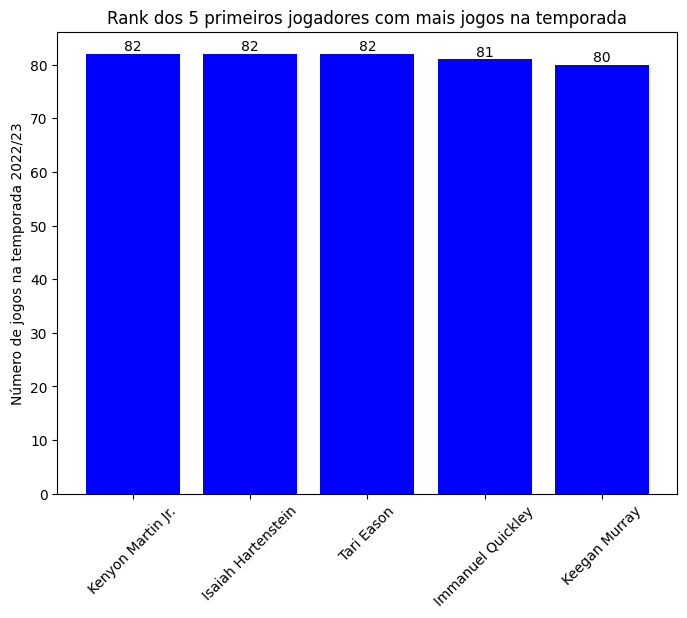

In [154]:
# Plotar o gráfico com o rank de jogadores com mais jogos na temporada
plt.figure(figsize=(8, 6))
ax = plt.bar(media_jogos_jovens['JOGADOR'], media_jogos_jovens['GP'], color='blue')
plt.ylabel('Número de jogos na temporada 2022/23')
plt.title('Rank dos 5 primeiros jogadores com mais jogos na temporada')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

In [165]:
# Criando um rank de jogos na temporada com jovens jogadores
media_jogos_jovens = calcular_jogos_titular(jovens_jogadores)
media_jogos_jovens = media_jogos_jovens.head(5)
media_jogos_jovens.head()

,JOGADOR,GP,GS,% COMO TITULAR,RANK
0,Anthony Edwards,79,79,1.00,1
1,Evan Mobley,79,79,1.00,2
2,Jaden McDaniels,79,79,1.00,3
3,Jabari Smith Jr.,79,79,1.00,4
4,Keegan Murray,80,78,0.98,5


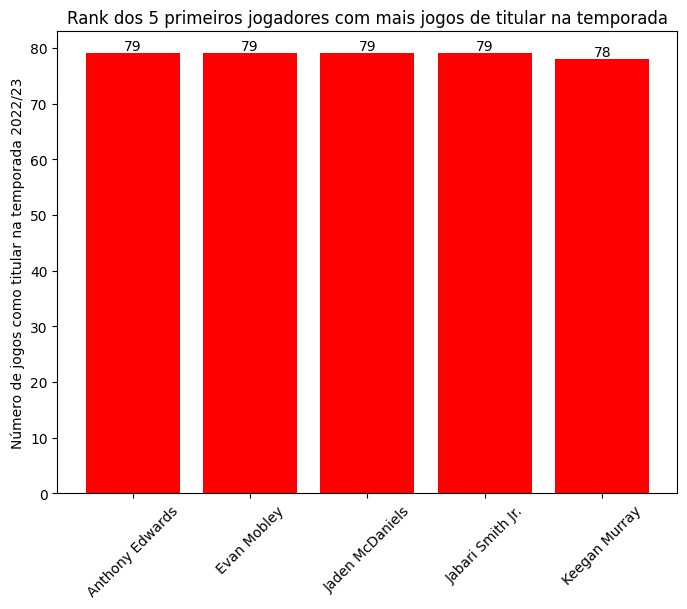

In [166]:
# Plotar o gráfico com o rank de jogos como titular na temporada
plt.figure(figsize=(8, 6))
ax = plt.bar(media_jogos_jovens['JOGADOR'], media_jogos_jovens['GS'], color='red')
plt.ylabel('Número de jogos como titular na temporada 2022/23')
plt.title('Rank dos 5 primeiros jogadores com mais jogos de titular na temporada')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

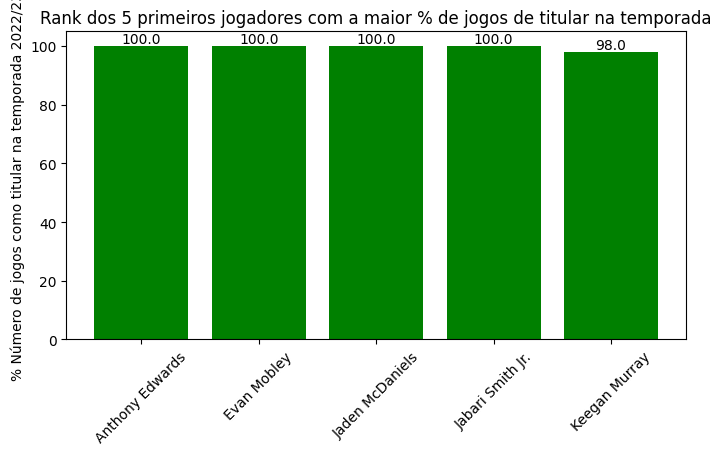

In [167]:
# Plotar o gráfico com o rank de % de jogos como titular
plt.figure(figsize=(8, 4))
ax = plt.bar(media_jogos_jovens['JOGADOR'], (media_jogos_jovens['% COMO TITULAR']*100), color='green')
plt.ylabel('% Número de jogos como titular na temporada 2022/23')
plt.title('Rank dos 5 primeiros jogadores com a maior % de jogos de titular na temporada')
plt.xticks(rotation=45)
for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()